# Importing the libraries

In [27]:
import pandas as pd
import numpy as np

# Importing the Boston Housing dataset

In [28]:
# CRIM - per capita crime rate by town
# ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
# INDUS - proportion of non-retail business acres per town.
# CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
# NOX - nitric oxides concentration (parts per 10 million)
# RM - average number of rooms per dwelling
# AGE - proportion of owner-occupied units built prior to 1940
# DIS - weighted distances to five Boston employment centres
# RAD - index of accessibility to radial highways
# TAX - full-value property-tax rate per $10,000
# PTRATIO - pupil-teacher ratio by town
# B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# LSTAT - % lower status of the population
# MEDV - Median value of owner-occupied homes in $1000's

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)
print(data.head(5))

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


# Understand the Dataset

## Display dataset shape and information

In [29]:
print("Dataset Shape:", data.shape)
print("\nDataset Info:")
print(data.info())

Dataset Shape: (506, 14)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None


## Check for missing values

In [30]:
print("\nMissing Values per Column:")
print(data.isnull().sum())


Missing Values per Column:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


## Summary statistics

In [31]:
print("\nDataset Summary:")
print(data.describe())


Dataset Summary:
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     2

# 1. Exploratory Data Analysis (EDA)

## Correlations and Visualizations

### Create a heatmap of correlations

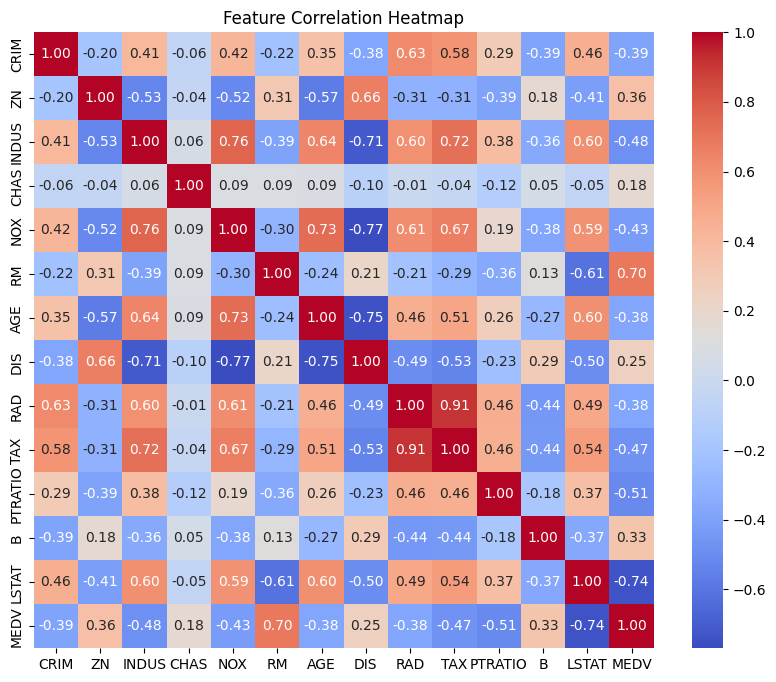

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

### Plot relationships between features and MEDV

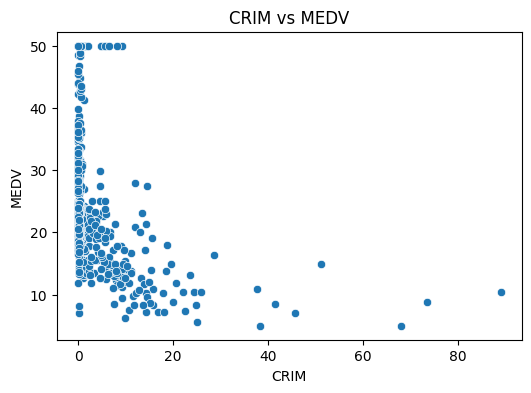

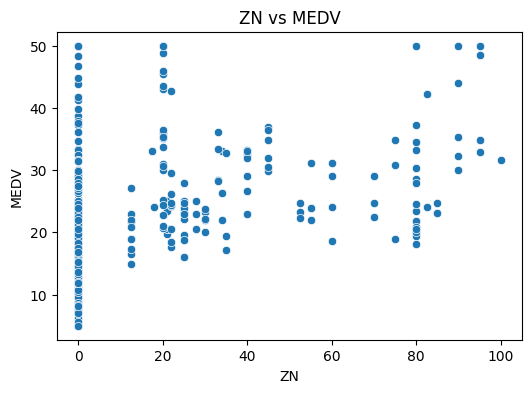

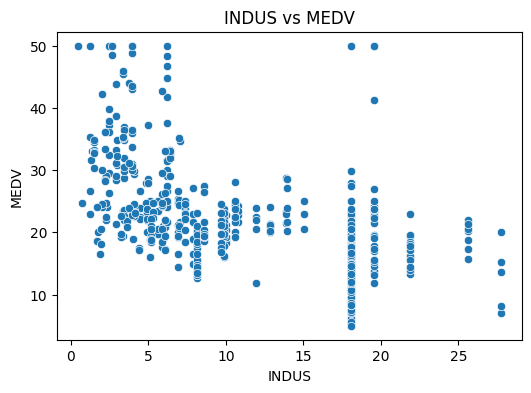

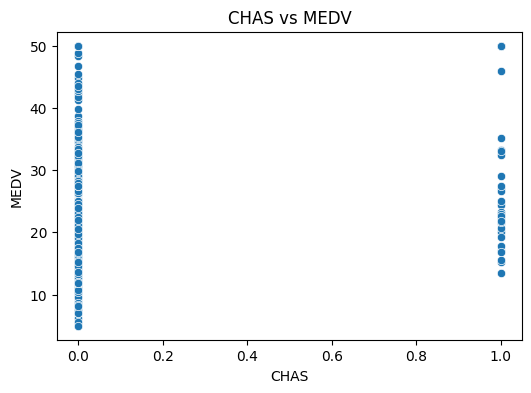

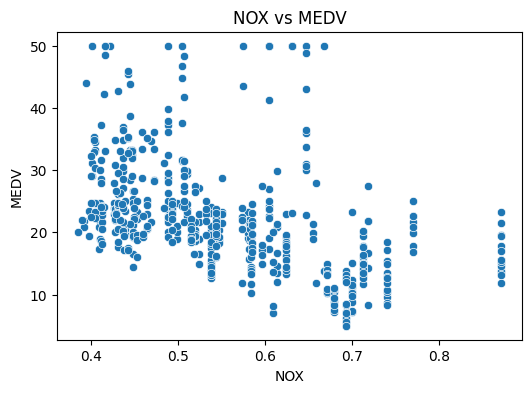

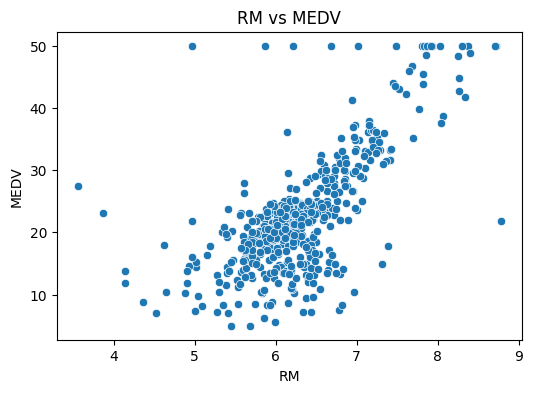

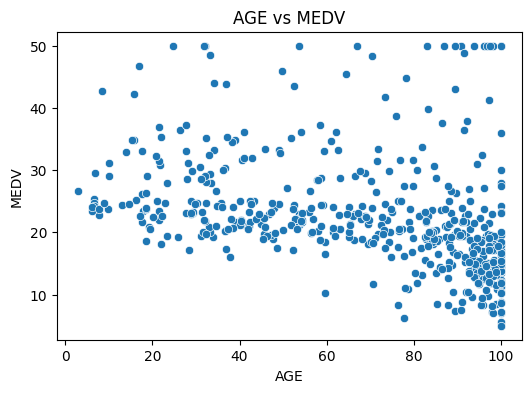

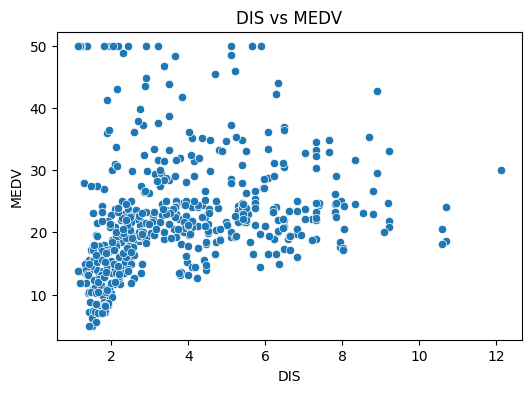

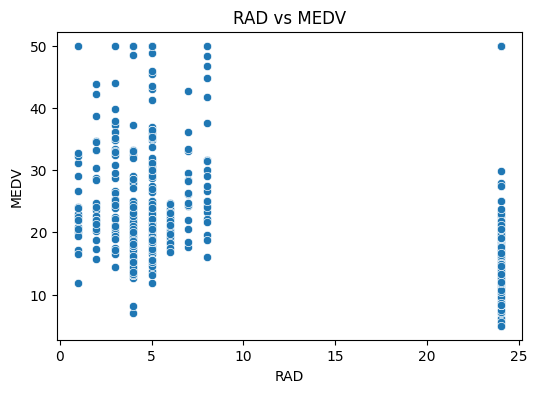

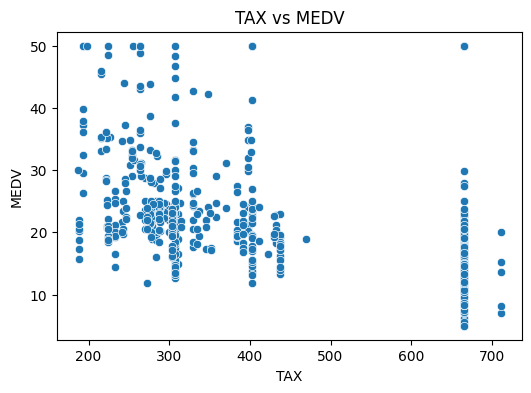

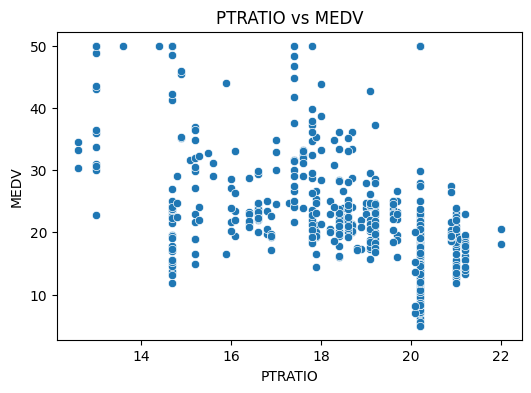

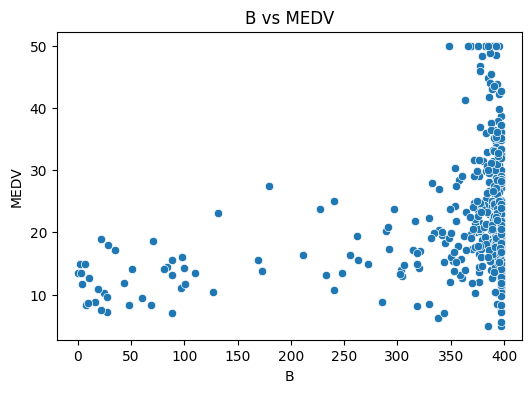

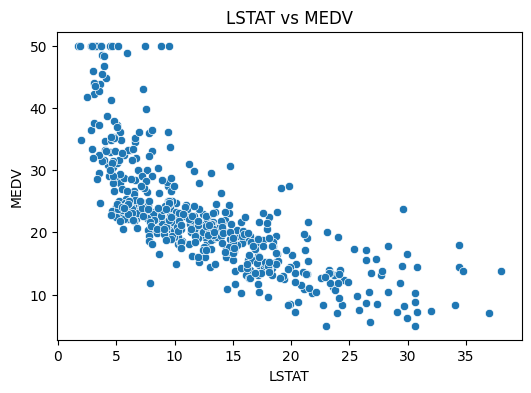

In [33]:
for col in column_names[:-1]:  # Exclude MEDV itself
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=data[col], y=data['MEDV'])
    plt.title(f"{col} vs MEDV")
    plt.xlabel(col)
    plt.ylabel("MEDV")
    plt.show()

## Histograms for Distribution

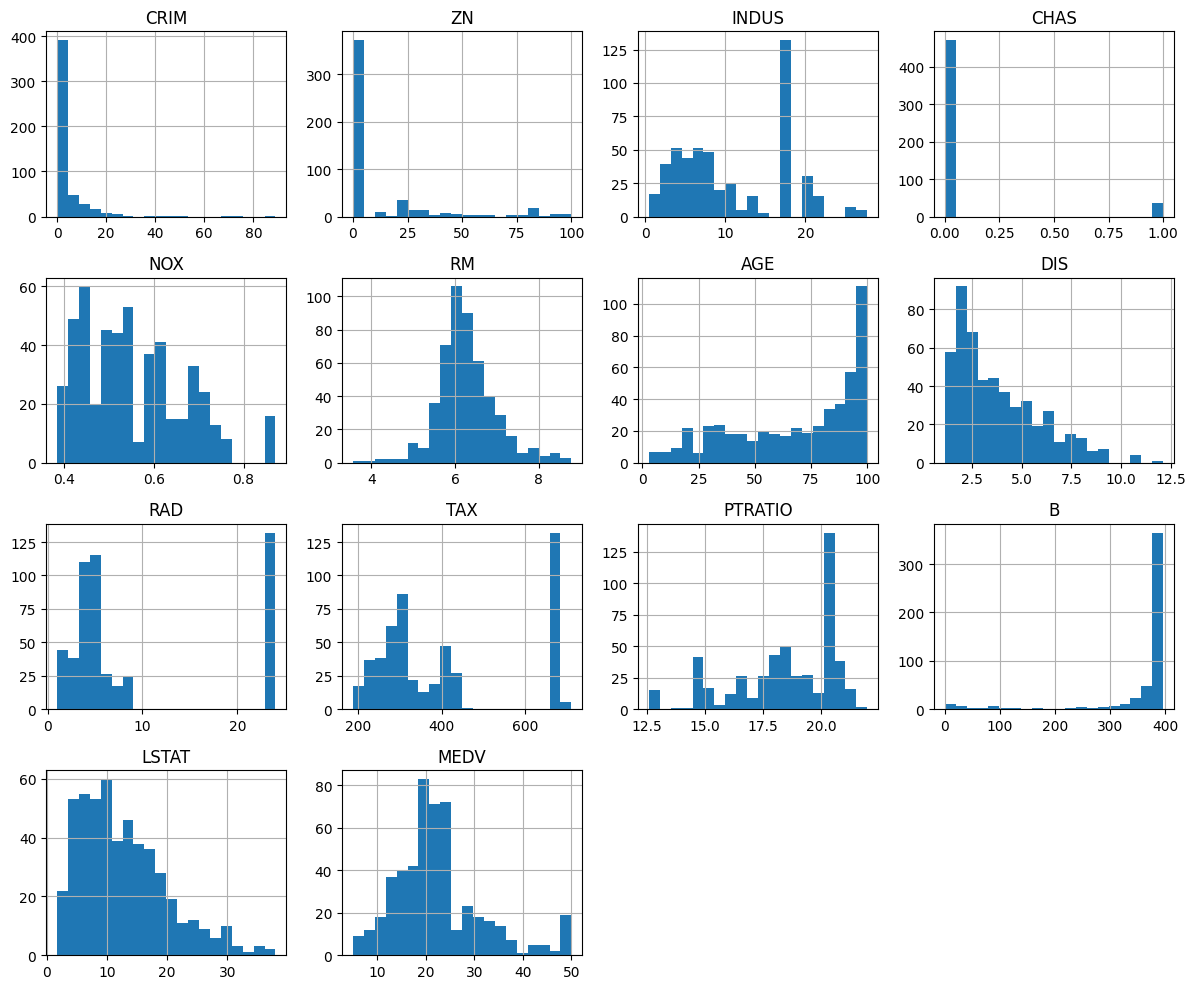

In [34]:
data.hist(bins=20, figsize=(12, 10))
plt.tight_layout()
plt.show()

# 2. Data Preprocessing

## Check for Outliers: Use boxplots to identify outliers

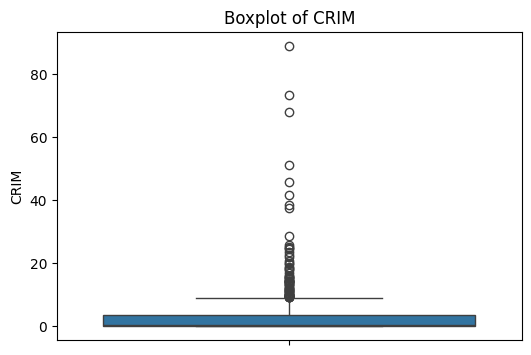

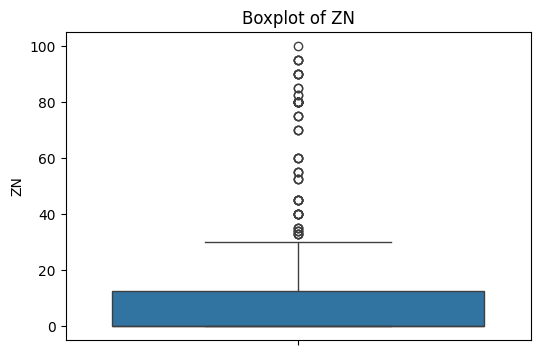

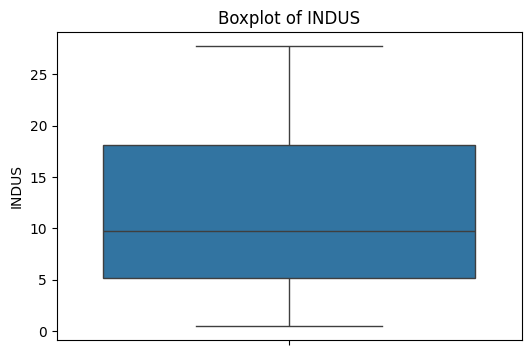

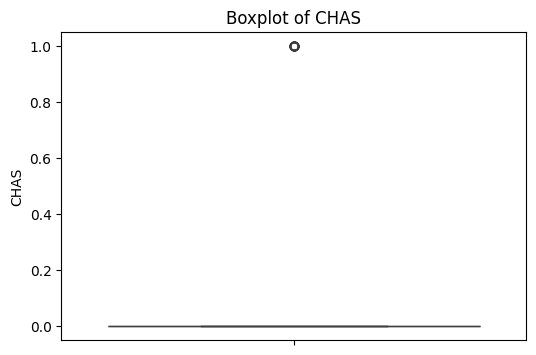

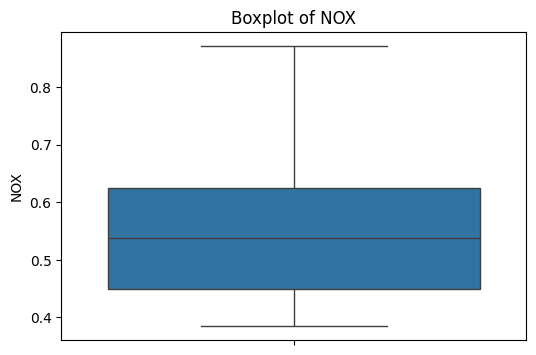

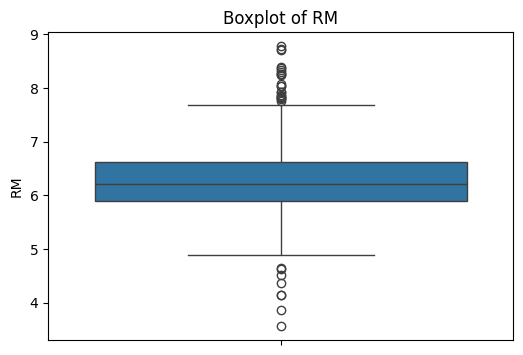

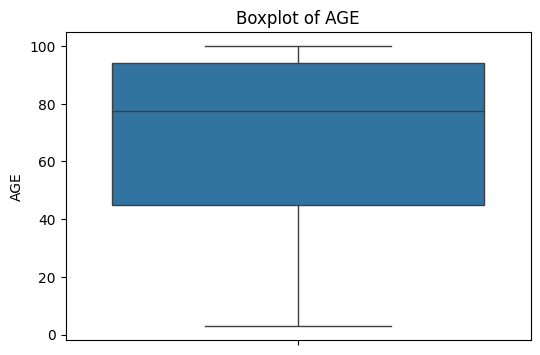

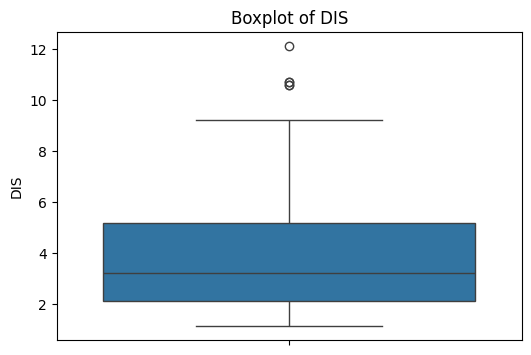

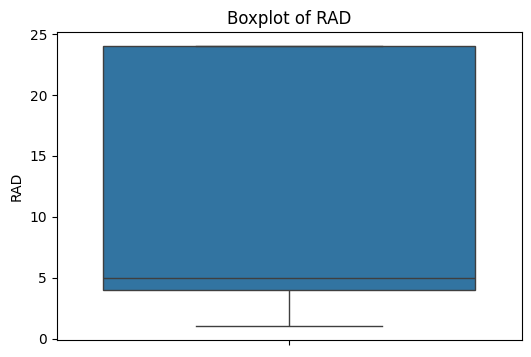

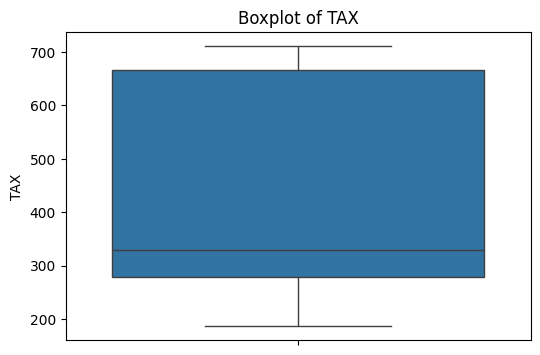

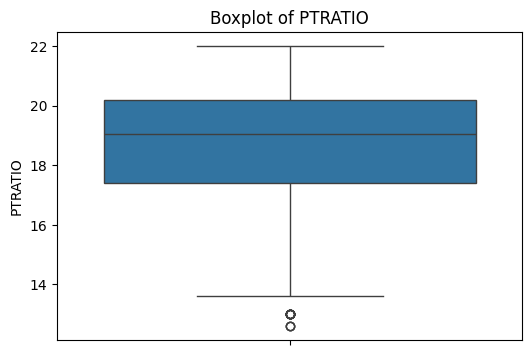

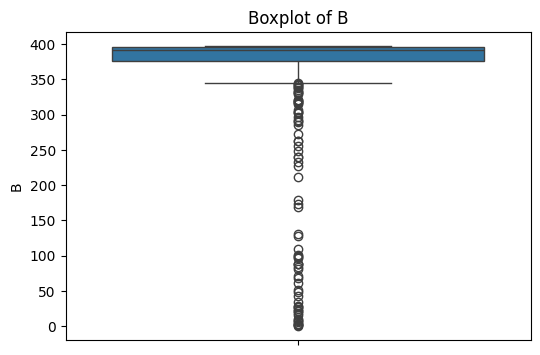

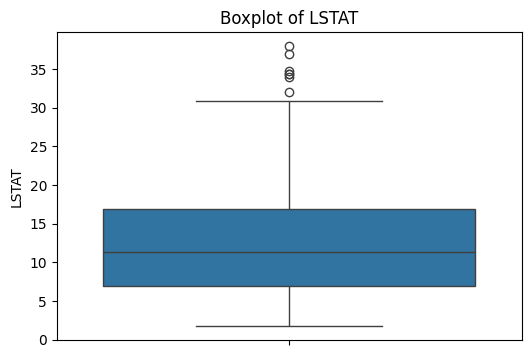

In [35]:
for col in column_names[:-1]:  # Exclude MEDV
    plt.figure(figsize=(6, 4))
    sns.boxplot(data[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

## Remove or Cap Outliers: Example for capping

In [36]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data = data.clip(lower=lower_bound, upper=upper_bound, axis=1)

## Feature Scaling: Normalize features for gradient descent

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features = column_names[:-1]  # Exclude MEDV
data[features] = scaler.fit_transform(data[features])

## Train-Test Split

In [38]:
from sklearn.model_selection import train_test_split

X = data[features].values
y = data['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Implement Gradient Descent

## Initialize Parameters

In [39]:
def initialize_weights(n_features):
    weights = np.zeros(n_features)
    bias = 0
    return weights, bias

## Compute Cost

In [40]:
def compute_cost(X, y, weights, bias):
    n = len(y)
    predictions = np.dot(X, weights) + bias
    cost = (1 / (2 * n)) * np.sum((predictions - y) ** 2)
    return cost

## Update Parameters

In [41]:
def update_weights(X, y, weights, bias, learning_rate):
    n = len(y)
    predictions = np.dot(X, weights) + bias
    errors = predictions - y

    # Gradients
    dW = (1 / n) * np.dot(X.T, errors)
    db = (1 / n) * np.sum(errors)

    # Update
    weights -= learning_rate * dW
    bias -= learning_rate * db

    return weights, bias

## Gradient Descent Loop

In [42]:
def gradient_descent(X, y, learning_rate=0.01, iterations=1000):
    weights, bias = initialize_weights(X.shape[1])
    costs = []

    for i in range(iterations):
        weights, bias = update_weights(X, y, weights, bias, learning_rate)
        cost = compute_cost(X, y, weights, bias)
        costs.append(cost)

        if i % 100 == 0:
            print(f"Iteration {i}: Cost = {cost}")

    return weights, bias, costs

## Run Gradient Descent

Iteration 0: Cost = 267.14050388306623
Iteration 100: Cost = 38.78747489116578
Iteration 200: Cost = 11.223019933403808
Iteration 300: Cost = 7.414500796126516
Iteration 400: Cost = 6.801973967881091
Iteration 500: Cost = 6.652834269716793
Iteration 600: Cost = 6.585391396902394
Iteration 700: Cost = 6.5408401011723925
Iteration 800: Cost = 6.5073496176117045
Iteration 900: Cost = 6.480977510878224


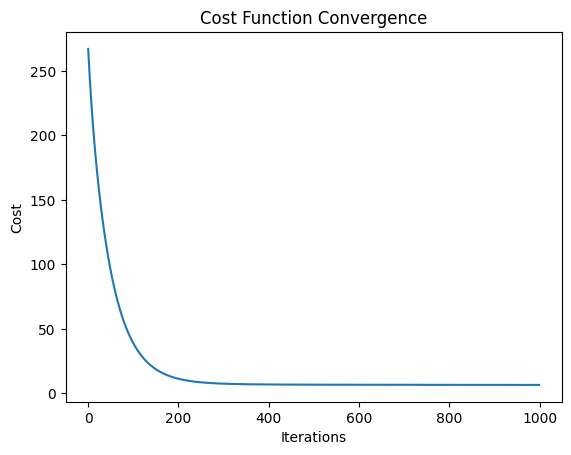

In [43]:
weights, bias, costs = gradient_descent(X_train, y_train, learning_rate=0.01, iterations=1000)

# Visualize cost function convergence
plt.plot(range(len(costs)), costs)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function Convergence")
plt.show()

# 4. Evaluate the Model

## Evaluate Gradient Descent Model

In [44]:
predictions = np.dot(X_test, weights) + bias
mse = np.mean((y_test - predictions) ** 2)
print("MSE (Gradient Descent):", mse)

MSE (Gradient Descent): 12.851467190080925


## Train and Compare with Scikit-learn

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)
sk_predictions = model.predict(X_test)

print("Sklearn MSE:", mean_squared_error(y_test, sk_predictions))
print("Sklearn R-squared:", r2_score(y_test, sk_predictions))

Sklearn MSE: 12.011193674104415
Sklearn R-squared: 0.7544975790596612


# 5. Hyperparameter Tuning

## Experiment with different learning rates

Iteration 0: Cost = 273.6497420935834
Iteration 100: Cost = 215.07844229398904
Iteration 200: Cost = 174.0261302254144
Iteration 300: Cost = 142.4389530810499
Iteration 400: Cost = 117.24003507498843
Iteration 500: Cost = 96.87301386467009
Iteration 600: Cost = 80.33178513020816
Iteration 700: Cost = 66.87076000808528
Iteration 800: Cost = 55.904837689349506
Iteration 900: Cost = 46.965005086599476
Iteration 0: Cost = 267.14050388306623
Iteration 100: Cost = 38.78747489116578
Iteration 200: Cost = 11.223019933403808
Iteration 300: Cost = 7.414500796126516
Iteration 400: Cost = 6.801973967881091
Iteration 500: Cost = 6.652834269716793
Iteration 600: Cost = 6.585391396902394
Iteration 700: Cost = 6.5408401011723925
Iteration 800: Cost = 6.5073496176117045
Iteration 900: Cost = 6.480977510878224
Iteration 0: Cost = 210.7527499369101
Iteration 100: Cost = 6.457126927619612
Iteration 200: Cost = 6.361215132334159
Iteration 300: Cost = 6.3309964206039915
Iteration 400: Cost = 6.3196556165270

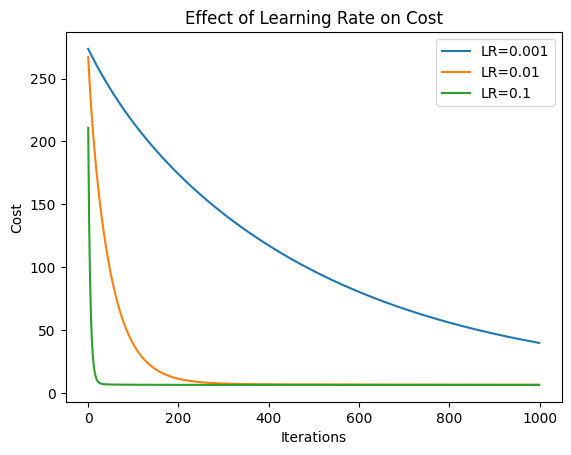

In [46]:
for lr in [0.001, 0.01, 0.1]:
    _, _, costs = gradient_descent(X_train, y_train, learning_rate=lr, iterations=1000)
    plt.plot(range(len(costs)), costs, label=f"LR={lr}")

plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.legend()
plt.title("Effect of Learning Rate on Cost")
plt.show()